TypeError: Invalid shape (30000,) for image data

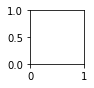

In [78]:
import os
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

size_100 = (100,100)
path = "D:/DI/Machine Learning/PYTHON_PROJECT/images"
def loadImages(path):
    '''
    :param path: absolute path of images
    :return: 2 arrays. The first one is an numpy array of numpy arrays
    30 rows of (10000,3). 100*100 pixels each one described
    by a tuple of 3 values (r,g,b)
    The second one dimensional array contains the image labels
    '''
    listOfImages = []
    labels = []
    for imageFileName in os.listdir(path):
        image = Image.open(path+"/"+imageFileName)
        image = image.resize(size_100)
        '''
        we reshape every image to an 1d array with size 100*100.
        each row contains a tuple with (r,g,b) values
        '''
        listOfImages.append(np.asarray(image).reshape(-1))
        if imageFileName.startswith('W'):
            labels.append(0)
        elif imageFileName.startswith('F'):
            labels.append(1)
        else:
            imageFileName.startswith('S')
            labels.append(2)
    arrayOfImages = np.asarray(listOfImages)
    arrayOfLabels = np.asarray(labels)
    return arrayOfImages,arrayOfLabels

def PCA_ImageSpaceVisualization(arrayOfImages):
    pca = PCA(n_components=2).fit(arrayOfImages)
    principalComponents = pca.transform(arrayOfImages)
    plt.figure(figsize=(9, 4))
    for i in range(1,25,1):
      plt.subplot(3, 8, i)
      plt.imshow(pca.components_[i].reshape(100,100), cmap='bone')
    # principalDf = pd.DataFrame(data = principalComponents
    #              , columns = ['principal component 1', 'principal component 2'])
    # print(principalDf)

if __name__ == '__main__':
   arrayOfImages, arrayOfLabels = loadImages(path)
   # print(arrayOfImages)
   # print(arrayOfLabels)
   PCA_ImageSpaceVisualization(arrayOfImages)
